## Робота з часовими рядами в Pandas

**Мета роботи:** Ознайомитись з основними представленнями часових рядів в
Pandas та операціями з ними.

**Завдання до лабораторної роботи**

Створити програму, яка виконує наступні завдання:
1. Створити не менше двох об’єктів TimeSeries, у яких індекси створені за
допомогою date_range(). Виділити підмасиви у цих об’єктів. Провести
об’єднання об’єктів TimeSeries за допомогою merge_asof().
2. Виконати завдання відповідно до варіанту.

**Варіант 3.**  

Файл digital_currency.csv.
1. Побудувати графік зміни ціни на час відкриття біржі (в доларах): 
   - а) загальний;
   - б) за 2019 рік;
   - в) за грудень 2020 року;
   - г) за жовтень 2018 – липень 2020;
   - д) за останні два тижня вересня 2020-го року.
2. Знайти середні значення найменшої ціни за день (в доларах): 
   - а) за 2019 рік; 
   - б) за кожний місяць; 
   - в) за кожний тиждень весни 2020 року.

In [1]:
import pandas as pd
import seaborn as sns

### Створити не менше двох об’єктів TimeSeries, у яких індекси створені за допомогою date_range(). Виділити підмасиви у цих об’єктів. Провести об’єднання об’єктів TimeSeries за допомогою merge_asof().

In [2]:
obj1 = pd.date_range('2019-12-07', periods=15, freq='B')

dt1 = pd.Series([i for i in range(len(obj1))], index=obj1, name="Datas")
dt1

2019-12-09     0
2019-12-10     1
2019-12-11     2
2019-12-12     3
2019-12-13     4
2019-12-16     5
2019-12-17     6
2019-12-18     7
2019-12-19     8
2019-12-20     9
2019-12-23    10
2019-12-24    11
2019-12-25    12
2019-12-26    13
2019-12-27    14
Freq: B, Name: Datas, dtype: int64

In [3]:
obj2 = pd.date_range('2019-12-03', periods=15, freq='D')

dt2 = pd.Series([i for i in range(len(obj2))], index=obj2, name="Datas2")
dt2

2019-12-03     0
2019-12-04     1
2019-12-05     2
2019-12-06     3
2019-12-07     4
2019-12-08     5
2019-12-09     6
2019-12-10     7
2019-12-11     8
2019-12-12     9
2019-12-13    10
2019-12-14    11
2019-12-15    12
2019-12-16    13
2019-12-17    14
Freq: D, Name: Datas2, dtype: int64

In [4]:
dt11 = pd.DataFrame(dt1.loc['2019-12-05':'2019-12-13'])
dt11['date'] = dt11.index
dt11

,Datas,date
2019-12-09,0,2019-12-09
2019-12-10,1,2019-12-10
2019-12-11,2,2019-12-11
2019-12-12,3,2019-12-12
2019-12-13,4,2019-12-13


In [5]:
dt22 = pd.DataFrame(dt2.loc['2019-12-06':'2019-12-11'])
dt22['date'] = dt22.index
dt22

,Datas2,date
2019-12-06,3,2019-12-06
2019-12-07,4,2019-12-07
2019-12-08,5,2019-12-08
2019-12-09,6,2019-12-09
2019-12-10,7,2019-12-10
2019-12-11,8,2019-12-11


In [6]:
pd.merge_asof(dt11, dt22)

,Datas,date,Datas2
0,0,2019-12-09,6
1,1,2019-12-10,7
2,2,2019-12-11,8
3,3,2019-12-12,8
4,4,2019-12-13,8


In [7]:
pd.merge_asof(dt11, dt22, direction="forward")

,Datas,date,Datas2
0,0,2019-12-09,6.0
1,1,2019-12-10,7.0
2,2,2019-12-11,8.0
3,3,2019-12-12,NaN
4,4,2019-12-13,NaN


###  Варіант 3.

In [8]:
df = pd.read_csv('digital_currency.csv',index_col=['date'],parse_dates=True)
df

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
date,,,,,,,,,
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227
...,...,...,...,...,...,...,...,...,...
2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972
2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621


### 1. Побудувати графік зміни ціни на час відкриття біржі (в доларах): 
   - а) загальний;
   - б) за 2019 рік;
   - в) за грудень 2020 року;
   - г) за жовтень 2018 – липень 2020;
   - д) за останні два тижня вересня 2020-го року.

а) загальний

<AxesSubplot:xlabel='date'>

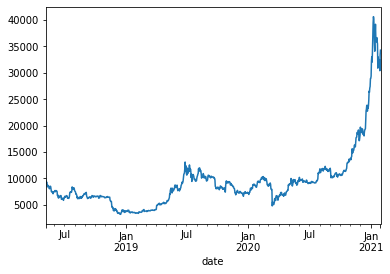

In [9]:
df.open_USD.plot()

б) за 2019 рік;

<AxesSubplot:xlabel='date'>

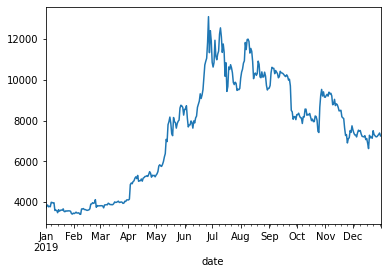

In [10]:
df.open_USD.loc['2019'].plot()

в) за грудень 2020 року

<AxesSubplot:xlabel='date'>

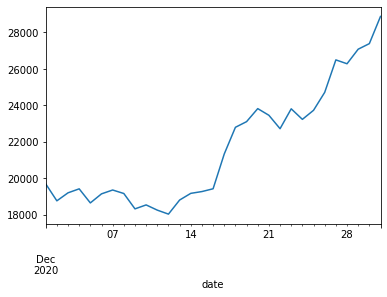

In [11]:
df.open_USD.loc['2020-12'].plot()

г) за жовтень 2018 – липень 2020

<AxesSubplot:xlabel='date'>

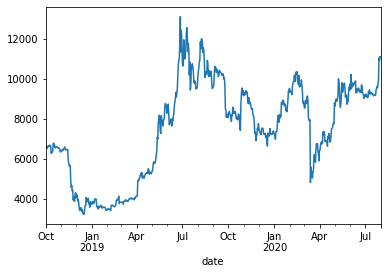

In [12]:
df.open_USD.loc['2018-10':'2020-07'].plot()

д) за останні два тижня вересня 2020-го року

<AxesSubplot:xlabel='date'>

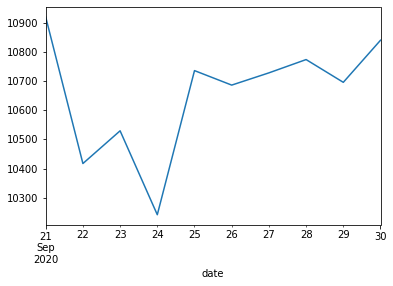

In [13]:
df.open_USD.loc['2020-09'].last('2W').plot()

### 2 Знайти середні значення найменшої ціни за день (в доларах):
   - а) за 2019 рік;
   - б) за кожний місяць;
   - в) за кожний тиждень весни 2020 року.


а) за 2019 рік

In [14]:
df.low_USD['2019'].mean()

7152.498493150685

б) за кожний місяць

In [15]:
pd.DataFrame(df.low_USD.resample('M').mean())

,low_USD
date,
2018-05-31,7973.228800
2018-06-30,6607.085000
2018-07-31,6934.625806
2018-08-31,6515.222903
2018-09-30,6470.139000
2018-10-31,6468.893548
2018-11-30,5333.953000
2018-12-31,3553.456452
2019-01-31,3573.680000


в) за кожний тиждень весни 2020 року

In [16]:
pd.DataFrame(df.low_USD['2020-03':'2020-05'].resample('W').mean())

,low_USD
date,
2020-03-01,8411.000000
2020-03-08,8625.148571
2020-03-15,5898.625714
2020-03-22,5269.928571
2020-03-29,6167.270000
2020-04-05,6401.414286
2020-04-12,6911.437143
2020-04-19,6777.932857
2020-04-26,7092.867143
